In [1]:
#importing various python libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from matplotlib.pyplot import figure
from pylab import rcParams
from matplotlib.patches import Patch #importing required library for plotting visualizations
from matplotlib.lines import Line2D
import warnings
warnings.filterwarnings("ignore")

In [2]:
#loading the dataset into dataframes
df = pd.read_csv('https://raw.githubusercontent.com/hemrathore/Heart-Stroke-Prediction-using-ML/main/stroke%20data%20dataset.csv')

In [3]:
df.head() #displaying the first 5 entries of dataframe

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,9046,Male,67.0,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,1
1,51676,Female,61.0,0,0,Yes,Self-employed,Rural,202.21,NaN,never smoked,1
2,31112,Male,80.0,0,1,Yes,Private,Rural,105.92,32.5,never smoked,1
3,60182,Female,49.0,0,0,Yes,Private,Urban,171.23,34.4,smokes,1
4,1665,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.0,never smoked,1


In [4]:
print('Dataframe number of records = '+str(df.shape[0]))
print('Dataframe number of variables (including the class) = '+str(df.shape[1]))

Dataframe number of records = 5110
Dataframe number of variables (including the class) = 12


##Preliminary Analysis:

In [5]:
df.dtypes #outputs the datatype of the variables

id                     int64
gender                object
age                  float64
hypertension           int64
heart_disease          int64
ever_married          object
work_type             object
Residence_type        object
avg_glucose_level    float64
bmi                  float64
smoking_status        object
stroke                 int64
dtype: object

In [6]:
for column in df.columns.values: #outputting the number of unique values for each column of the dataset
  listofunique= pd.unique(df[column])
  print(column+ ' has ' + str(len(listofunique))+ ' unique values ')

id has 5110 unique values 
gender has 3 unique values 
age has 104 unique values 
hypertension has 2 unique values 
heart_disease has 2 unique values 
ever_married has 2 unique values 
work_type has 5 unique values 
Residence_type has 2 unique values 
avg_glucose_level has 3979 unique values 
bmi has 419 unique values 
smoking_status has 4 unique values 
stroke has 2 unique values 


In [7]:
for column in df.columns.values: #outputting the number of null values for each column of the dataset
  print(column+ ' has ' + str(df[column].isna().sum()) + ' null values ')

id has 0 null values 
gender has 0 null values 
age has 0 null values 
hypertension has 0 null values 
heart_disease has 0 null values 
ever_married has 0 null values 
work_type has 0 null values 
Residence_type has 0 null values 
avg_glucose_level has 0 null values 
bmi has 201 null values 
smoking_status has 0 null values 
stroke has 0 null values 


Therefore, only bmi has null values (201), and 'id' is unique for every record present in the dataset.

In [8]:
df=df.dropna() #dropping those records having null value as an entry

In [9]:
print('Dataframe number of records = '+str(df.shape[0])) #new number of records after dropping those having bmi as null value entry

Dataframe number of records = 4909


##Exploratory Data Analysis:

The histogram for gender is: 



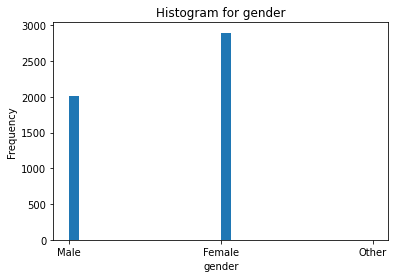

The histogram for age is: 



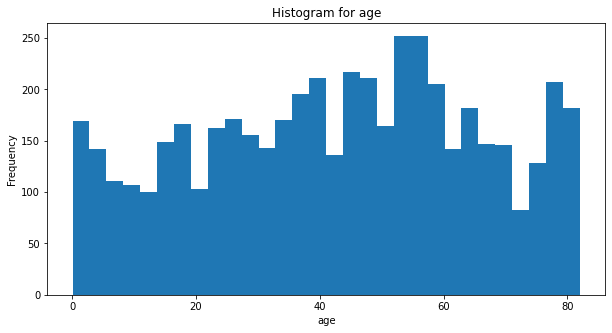

The histogram for hypertension is: 



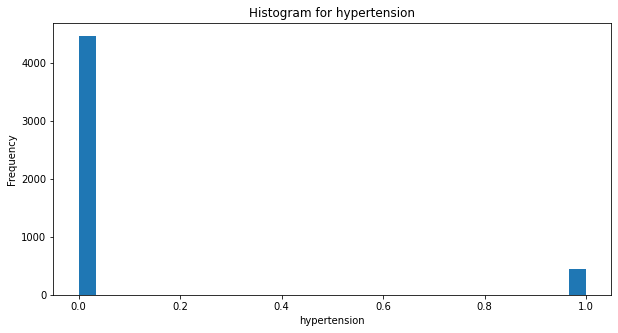

The histogram for heart_disease is: 



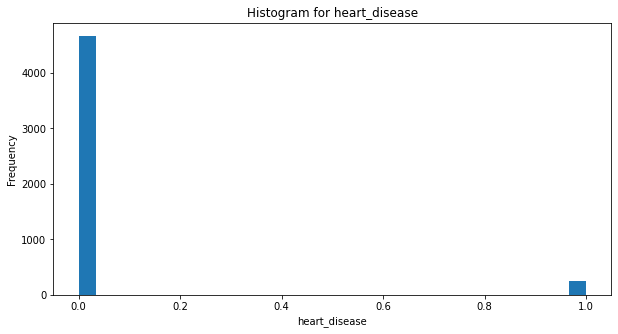

The histogram for ever_married is: 



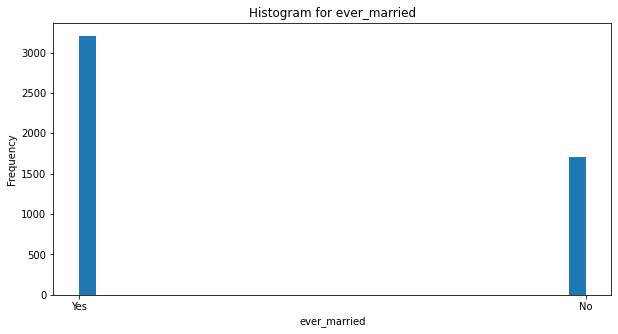

The histogram for work_type is: 



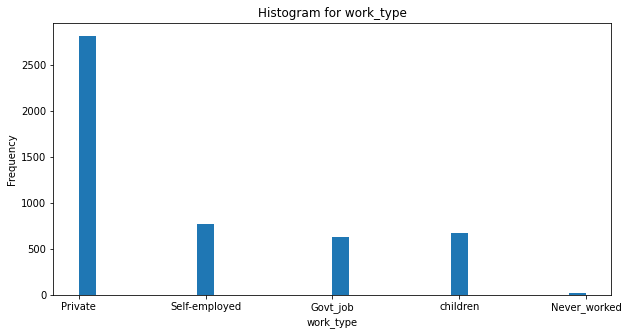

The histogram for Residence_type is: 



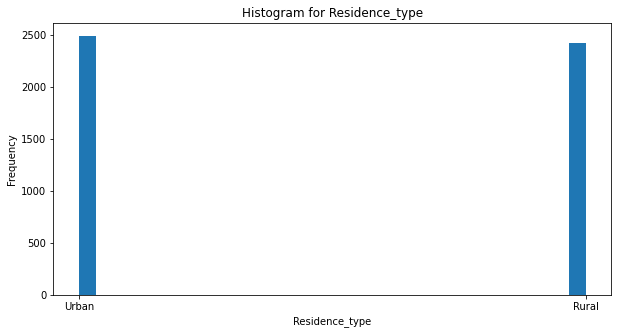

The histogram for avg_glucose_level is: 



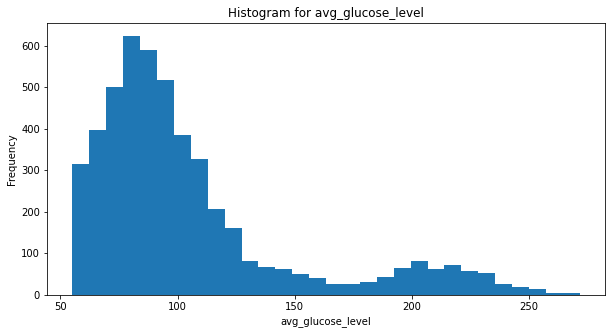

The histogram for bmi is: 



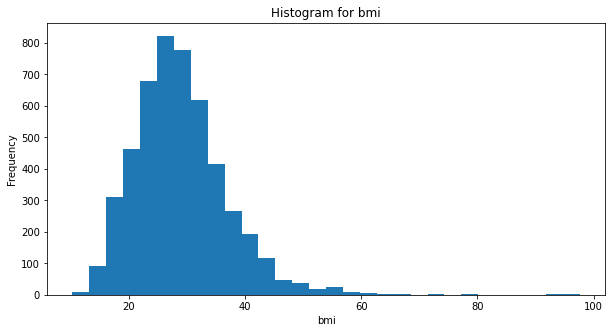

The histogram for smoking_status is: 



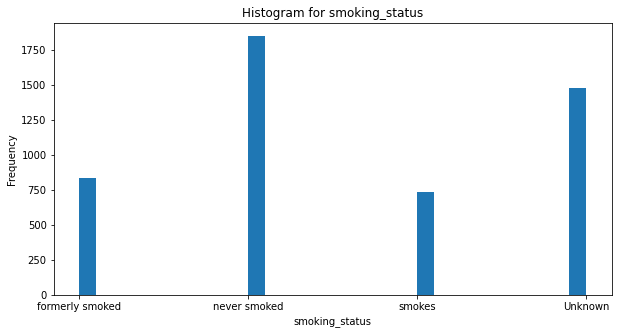

The histogram for stroke is: 



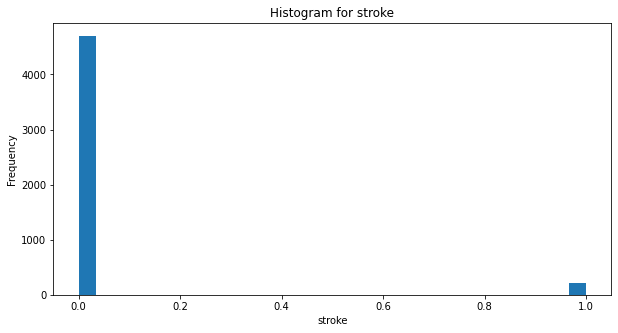

In [10]:
#plotting histograms of all the columns
df2=df.drop(columns=['id']) #dropping columns which have no sense in plotting a histogram for
for col in df2.columns.values:
 print('The histogram for '+col+' is: ')
 plt.hist(df2[col], bins=30)
 plt.title('Histogram for '+col)
 print()
 plt.xlabel(col)
 plt.ylabel('Frequency')
 rcParams['figure.figsize'] = 10, 5
 plt.show();

From the above, we get an idea as to how our variables are distributed.

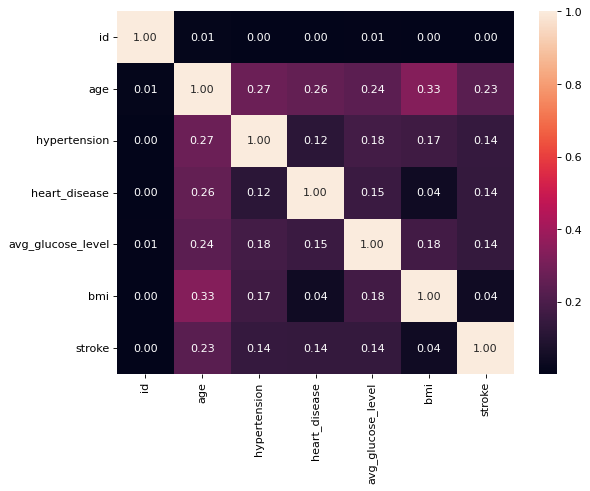

In [11]:
#Plotting a heatmap to see the correlation between the various continuous variables
figure(num=None, figsize=(8, 6), dpi=80, facecolor='w', edgecolor='k')
sns.heatmap(df.corr(), annot=True, fmt=".2f")
plt.show()

The heatmap shows us that id has no correlation to any feature, which was expected. The maximum correlation is 0.33 between age and bmi, and all features are positively correlated, i.e, if one increases the other also increases.

The qq plot for age is: 


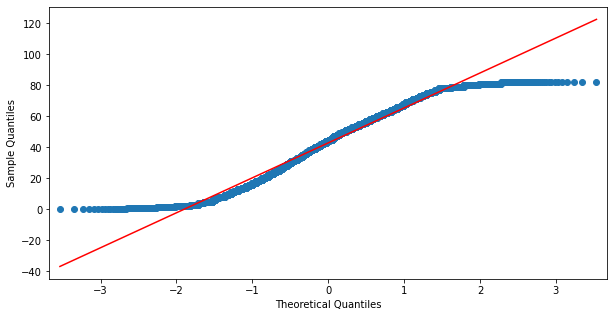


The qq plot for avg_glucose_level is: 


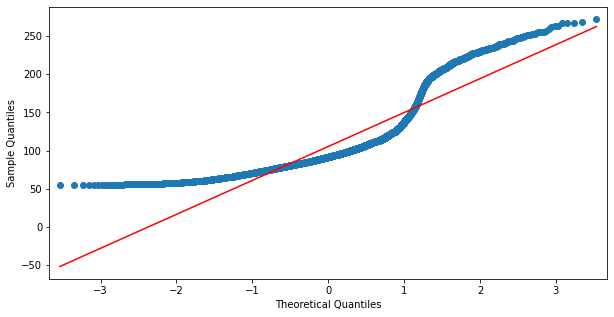


The qq plot for bmi is: 


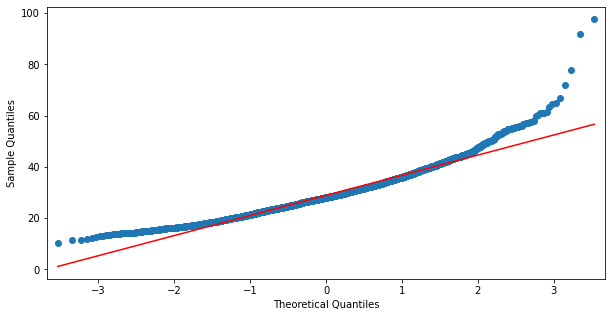

In [12]:
#Plotting the QQ Plots of the continuous numerical variables
import statsmodels.api as sm
import warnings
warnings.filterwarnings('ignore')
continuousvariables=['age', 'avg_glucose_level', 'bmi']
for variable in continuousvariables:
 print('The qq plot for '+ variable + ' is: ')
 fig = sm.qqplot(df[variable],line='s')
 plt.show();
 print()

From the above Quantile Quantile plot, we infer how the continuous variables are distributed (blue line) wrt a normal Gaussian distribution (red line). The variable bmi and age are majorly normal distributed, but average glucose level is very skewed.

Count of stroke and non-stroke patients vs. their work type situation


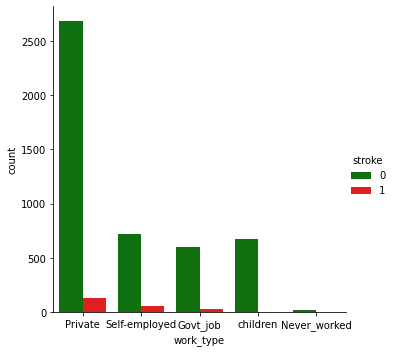

In [13]:
#To visualize how work type affects the possibility of a stroke occuring
print('Count of stroke and non-stroke patients vs. their work type situation')
fig, ax = plt.subplots()

sns.catplot('work_type', hue="stroke", data=df, kind="count", 
            palette={0:"green", 1:"red"}, ax=ax)


plt.close(1)
ax.set_xlabel("Work type")

color_patches = [
    Patch(facecolor="green", label='Never experienced stroke'),
    Patch(facecolor="red", label="Experienced stroke")
]
ax.legend(handles=color_patches)

plt.show();

From the above catplot, we can observe that there is no children or never worked patients with the possibility of a stroke, as expected given their age must be less. For the remaining three, the data isnt recorded equally amongst them, so no exact conclusion can be made.

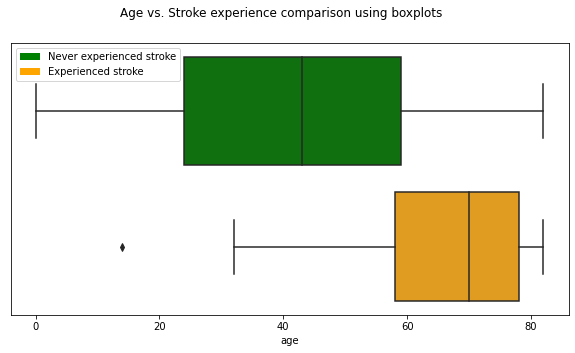

In [14]:
#To see how age affects the possibility of a stroke occuring
fig, ax = plt.subplots()

sns.boxplot(x="age", y="stroke", data=df, orient="h", palette={0:"green", 1:"orange"}, ax=ax)

ax.get_yaxis().set_visible(False)

fig.suptitle("Age vs. Stroke experience comparison using boxplots")
color_patches = [
    Patch(facecolor="green", label="Never experienced stroke"),
    Patch(facecolor="orange", label="Experienced stroke")
]
ax.legend(handles=color_patches);

From the above boxplots we infer that the average age when stroke occurs is greater than that if no stroke occurs, as expected usually. The upper quartile of no-stroke occuring is approximately at the same age of lower quartile of a stroke occuring. 

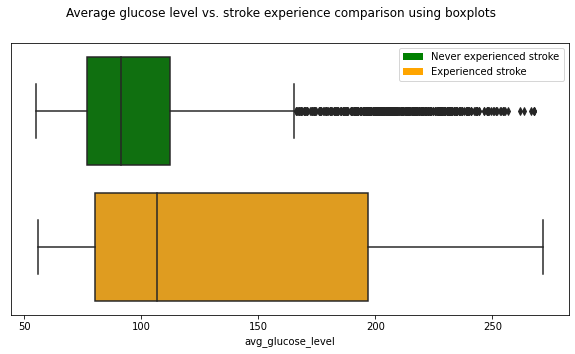

In [15]:
#To see how average glucose level affects the possibility of a stroke occuring
fig, ax = plt.subplots()

sns.boxplot(x="avg_glucose_level", y="stroke", data=df, orient="h", palette={0:"green", 1:"orange"}, ax=ax)

ax.get_yaxis().set_visible(False)

fig.suptitle("Average glucose level vs. stroke experience comparison using boxplots")
color_patches = [
    Patch(facecolor="green", label="Never experienced stroke"),
    Patch(facecolor="orange", label="Experienced stroke")
]
ax.legend(handles=color_patches);

From the boxplots we infer that the possiblity of stroke taking place is greater for those with higher glucose level, though the green boxplot has a high numbe out outliers as well.

##Data Pre-processing:

In [16]:
df=df.drop(columns=['id']) #dropping features which have no relation to the target variable at all and have huge no. of unique values

In [17]:
#One-hot encoding categorical variables
categorical_cols = ['gender','ever_married','work_type','Residence_type','smoking_status']  
df = pd.get_dummies(df, columns = categorical_cols)

display(df)

,age,hypertension,heart_disease,avg_glucose_level,bmi,stroke,gender_Female,gender_Male,gender_Other,ever_married_No,...,work_type_Never_worked,work_type_Private,work_type_Self-employed,work_type_children,Residence_type_Rural,Residence_type_Urban,smoking_status_Unknown,smoking_status_formerly smoked,smoking_status_never smoked,smoking_status_smokes
0,67.0,0,1,228.69,36.6,1,0,1,0,0,...,0,1,0,0,0,1,0,1,0,0
2,80.0,0,1,105.92,32.5,1,0,1,0,0,...,0,1,0,0,1,0,0,0,1,0
3,49.0,0,0,171.23,34.4,1,1,0,0,0,...,0,1,0,0,0,1,0,0,0,1
4,79.0,1,0,174.12,24.0,1,1,0,0,0,...,0,0,1,0,1,0,0,0,1,0
5,81.0,0,0,186.21,29.0,1,0,1,0,0,...,0,1,0,0,0,1,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5104,13.0,0,0,103.08,18.6,0,1,0,0,1,...,0,0,0,1,1,0,1,0,0,0
5106,81.0,0,0,125.20,40.0,0,1,0,0,0,...,0,0,1,0,0,1,0,0,1,0
5107,35.0,0,0,82.99,30.6,0,1,0,0,0,...,0,0,1,0,1,0,0,0,1,0
5108,51.0,0,0,166.29,25.6,0,0,1,0,0,...,0,1,0,0,1,0,0,1,0,0


In [18]:
#Scaling continuous variables
continuousvariables=['age', 'avg_glucose_level', 'bmi']
for col in continuousvariables:
  df[col]=(df[col]-df[col].mean())/df[col].std()
display(df)

,age,hypertension,heart_disease,avg_glucose_level,bmi,stroke,gender_Female,gender_Male,gender_Other,ever_married_No,...,work_type_Never_worked,work_type_Private,work_type_Self-employed,work_type_children,Residence_type_Rural,Residence_type_Urban,smoking_status_Unknown,smoking_status_formerly smoked,smoking_status_never smoked,smoking_status_smokes
0,1.070029,0,1,2.777415,0.981245,1,0,1,0,0,...,0,1,0,0,0,1,0,1,0,0
2,1.646395,0,1,0.013840,0.459222,1,0,1,0,0,...,0,1,0,0,1,0,0,0,1,0
3,0.271984,0,0,1.483980,0.701135,1,1,0,0,0,...,0,1,0,0,0,1,0,0,0,1
4,1.602059,1,0,1.549035,-0.623020,1,1,0,0,0,...,0,0,1,0,1,0,0,0,1,0
5,1.690731,0,0,1.821183,0.013593,1,0,1,0,0,...,0,1,0,0,0,1,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5104,-1.324106,0,0,-0.050089,-1.310561,0,1,0,0,1,...,0,0,0,1,1,0,1,0,0,0
5106,1.690731,0,0,0.447837,1.414142,0,1,0,0,0,...,0,0,1,0,0,1,0,0,1,0
5107,-0.348718,0,0,-0.502318,0.217309,0,1,0,0,0,...,0,0,1,0,1,0,0,0,1,0
5108,0.360655,0,0,1.372780,-0.419303,0,0,1,0,0,...,0,1,0,0,1,0,0,1,0,0


In [19]:
#shuffling the data to get rid of any underlying order that may exist
df = df.sample(frac = 1) 
display(df)

,age,hypertension,heart_disease,avg_glucose_level,bmi,stroke,gender_Female,gender_Male,gender_Other,ever_married_No,...,work_type_Never_worked,work_type_Private,work_type_Self-employed,work_type_children,Residence_type_Rural,Residence_type_Urban,smoking_status_Unknown,smoking_status_formerly smoked,smoking_status_never smoked,smoking_status_smokes
2913,0.050305,1,0,0.010464,1.006709,0,1,0,0,0,...,0,0,0,0,1,0,0,0,1,0
1642,-0.082703,0,0,-0.404399,0.688403,0,0,1,0,0,...,0,1,0,0,1,0,0,1,0,0
1917,-1.545786,0,0,-0.854828,-1.552474,0,1,0,0,1,...,0,0,0,1,0,1,1,0,0,0
2761,0.005969,0,0,-0.393594,1.261355,0,0,1,0,0,...,0,1,0,0,0,1,0,1,0,0
542,0.493663,0,0,-0.585381,0.217309,0,1,0,0,0,...,0,0,1,0,0,1,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4219,0.537999,0,0,-0.754432,1.796109,0,1,0,0,0,...,0,0,0,0,0,1,0,1,0,0
614,0.404991,0,0,-0.388642,1.681519,0,1,0,0,1,...,0,1,0,0,1,0,0,0,1,0
2399,-0.437390,0,0,0.171862,1.796109,0,1,0,0,0,...,0,0,1,0,1,0,0,0,1,0
2755,-1.767465,0,0,-0.379863,-1.425152,0,0,1,0,1,...,0,0,0,1,0,1,1,0,0,0


In [20]:
#Preparing the data for training the model
X= df.drop(['stroke'], axis=1)
Y= df['stroke']
print(len(X)) #number of samples

4909


In [21]:
#Splitting X and Y into training, validation and test sets in 70:15:15 ratio

from sklearn.model_selection import train_test_split
# Defines ratios, w.r.t. whole dataset.
ratio_train = 0.7
ratio_val = 0.15
ratio_test = 0.15

# Produces test split.
X_remaining, X_test, Y_remaining, Y_test = train_test_split(
    X, Y, test_size=ratio_test)

# Adjusts val ratio, w.r.t. remaining dataset.
ratio_remaining = 1 - ratio_test
ratio_val_adjusted = ratio_val / ratio_remaining

# Produces train and val splits.
X_train, X_val, Y_train, Y_val = train_test_split(
    X_remaining, Y_remaining, test_size=ratio_val_adjusted)

print(X_train.shape)
print(Y_train.shape)
print(X_val.shape)
print(Y_val.shape)
print(X_test.shape)
print(Y_test.shape)

(3435, 21)
(3435,)
(737, 21)
(737,)
(737, 21)
(737,)


##(1) Decision Tree:

Hyperparameter Tuning by cross validation:

In [22]:
from scipy.stats import randint
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import RandomizedSearchCV
from sklearn.tree import DecisionTreeClassifier, export_graphviz
from sklearn.metrics import accuracy_score, f1_score, confusion_matrix,ConfusionMatrixDisplay
from graphviz import Source
from IPython.display import Image
from IPython.display import display
from sklearn.metrics import classification_report

In [23]:
# Setup the parameters and distributions to sample from: param_dist
param_dist = {"max_depth": [3, None],
              "max_features": randint(1, 9),
              "min_samples_leaf": randint(1, 9),
              "criterion": ["gini", "entropy"]}

# Instantiate a Decision Tree classifier: tree
tree = DecisionTreeClassifier()

# Instantiate the RandomizedSearchCV object: tree_cv
tree_cv = RandomizedSearchCV(tree, param_dist, cv=5)

result_dt= tree_cv.fit(X_train,Y_train)

In [24]:
result_dt.best_params_ #the best hyperparameters after tuning

{'criterion': 'gini', 'max_depth': 3, 'max_features': 4, 'min_samples_leaf': 6}

The above parameters are the optimal ones we should consider 

In [25]:
#Training the classifier
model_dt = DecisionTreeClassifier(criterion='gini',max_depth=3,max_features=4, min_samples_leaf=2)
model_dt.fit(X_train,Y_train)

DecisionTreeClassifier(max_depth=3, max_features=4, min_samples_leaf=2)

              precision    recall  f1-score   support

           0       0.97      1.00      0.98       714
           1       0.00      0.00      0.00        23

    accuracy                           0.97       737
   macro avg       0.48      0.50      0.49       737
weighted avg       0.94      0.97      0.95       737



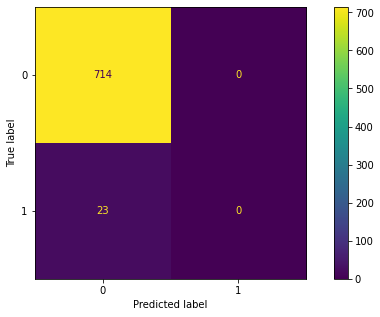

In [26]:
#Evaluating the model on validation data
Y_pred = model_dt.predict(X_val)
# Performance Statistics
print(classification_report(Y_val, Y_pred))
cm = confusion_matrix(Y_val, Y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm,display_labels=[0,1])
disp.plot();

From the above we get the accuracy of Decison tree to be 96%, with 707/737 samples being correctly classified and 30/737 being wrongly classified as 0 label instead of their true label 1. 

##Does ensemble of many decision trees (random forest) perform better than this?

In [27]:
from sklearn.ensemble import RandomForestClassifier
model_rf = RandomForestClassifier(n_estimators=20, random_state=0) #creating an instance of random forest classifier
model_rf.fit(X_train, Y_train)
Y_pred_rf = model_rf.predict(X_test)

              precision    recall  f1-score   support

           0       0.94      1.00      0.97       692
           1       1.00      0.02      0.04        45

    accuracy                           0.94       737
   macro avg       0.97      0.51      0.51       737
weighted avg       0.94      0.94      0.91       737



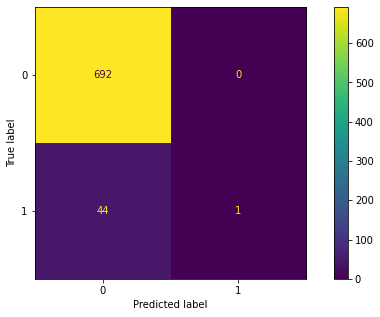

In [28]:
# Performance Statistics
print(classification_report(Y_test, Y_pred_rf))
cm = confusion_matrix(Y_test, Y_pred_rf)
disp = ConfusionMatrixDisplay(confusion_matrix=cm,display_labels=[0,1])
disp.plot();

From the above, we notice that the performance of the ensemble is not better than that of a single decision tree classifier, since it has an accuracy of 95%. This is because aggregated/ensemble models are not universally better than their single counterparts. They are better only if the single models suffer of instability. In our case, decison tree performed quite accurately. In cases of less training data like ours, decision tree performs better.

## (2) Logistic Regression:

In [29]:
#importing the required tools
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix, ConfusionMatrixDisplay, roc_curve, roc_auc_score, precision_recall_curve

##Model Training and Predictions
##Logistic Regression classification
In the Logistic Regression model, the probabilities describing the possible outcomes of a single trial are modeled using a logistic function.

The standard logistic function is given as:$$
f(x)=\frac{1}{1+e^{-x}}=\frac{e^{x}}{e^{x}+1}
$$

Thus, for the logistic regression model:

$$
P\left(y=1\right)=\frac{1}{1+\exp \left(-{w}^{\top} {x}\right)}
$$

In [30]:
# Fit model to training data
classifier = LogisticRegression(penalty='l2', tol=1e-6, max_iter=10000)
classifier.fit(X_train, Y_train)
# Evaluate on test data 
y_pred = classifier.predict(X_test)

##Model Performance

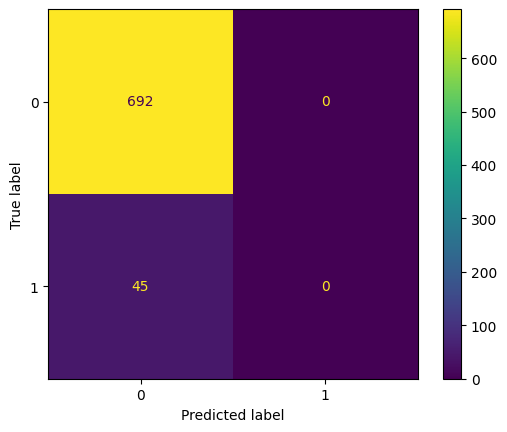

In [31]:
# set default Seaborn theme
sns.set_theme()
# Confusion Matrix
class_labels = df['smoking_status_smokes'].unique()
cmx = confusion_matrix(Y_test, y_pred, labels=class_labels)
disp = ConfusionMatrixDisplay(confusion_matrix=cmx, display_labels=class_labels)
# switch off Seaborn theme for CM plot
sns.reset_orig()
disp.plot()

In [32]:
# Performance Statistics
print(classification_report(Y_test, y_pred))

              precision    recall  f1-score   support

           0       0.94      1.00      0.97       692
           1       0.00      0.00      0.00        45

    accuracy                           0.94       737
   macro avg       0.47      0.50      0.48       737
weighted avg       0.88      0.94      0.91       737



##Understanding the results
The model is able to achieve 95% classification accuracy on the test set (15% split) consisting of 737 examples. This means that the Logistic Regresssion model was able to correctly predict the Outcome (both positive/negative) for 704/737 test examples.

##ROC and PR Curves
When evaluating binary decision problems, one should use Receiver Operator Characteristic (ROC) curves, which show how the number of correctly classified positive examples varies with the number of incorrectly classified negative examples. However, ROC curves can present an overly optimistic view of an algorithm’s performance if there is a large skew in the class distribution.

Precision-Recall (PR) curves, often used in Information Retrieval, have been cited as an alternative to ROC curves for tasks with a large skew in the class distribution.

In ROC space, one plots the False Positive Rate (FPR) on the x-axis and the True Positive Rate (TPR) on the y-axis. The FPR measures the fraction of negative examples that are misclassified as positive. The TPR measures the fraction of positive examples that are correctly labeled. In PR space, one plots Recall on the x-axis and Precision on the y-axis. Recall is the same as TPR, whereas Precision measures that fraction of examples classified as positive that are truly positive.

In [33]:
# switch to default Seaborn theme
sns.set_theme()

def plot_curve(y1, x1, y2, x2, y_label,  x_label, y1_label, y2_label, title):
    """For plotting metrics of 2 models"""
    plt.figure()
    plt.plot(x1, y1, label=y1_label)
    if not (x2 is None or y2 is None or y2_label is None):
        plt.plot(x2, y2, label=y2_label, linestyle='--')
    plt.xlabel(x_label)
    plt.ylabel(y_label)
    plt.title(title)
    plt.legend(loc="lower right")
    plt.show()

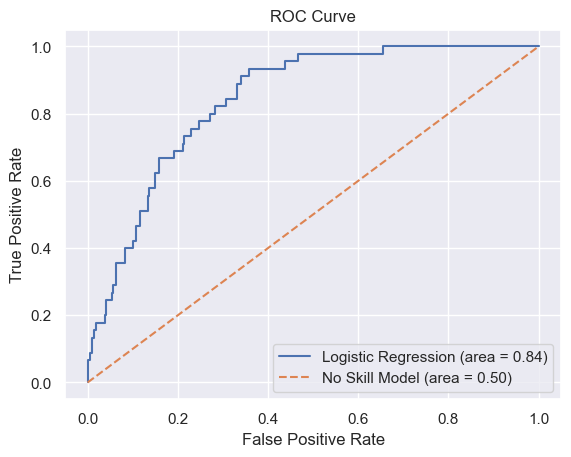

In [34]:
# ROC curve

# get probabilities of test sample being labelled as positive (1) from the LR model.
lr_probs = classifier.predict_proba(X_test)[:, 1]

# get roc curve vectors for plotting
fpr, tpr, thresholds = roc_curve(Y_test, lr_probs)

# Compare with baseline 'No Skill' model which returns prob = 0 for all samples
ns_probs = [0.] * len(lr_probs)
ns_fpr, ns_tpr, _ = roc_curve(Y_test, ns_probs)

# Area under ROC curve
lr_auc_roc = roc_auc_score(Y_test, lr_probs)

# plot AUC
plot_curve(y1=tpr,
           x1=fpr,
           y2=ns_tpr,
           x2=ns_fpr,
           y_label='True Positive Rate',
           x_label='False Positive Rate',
           y1_label='Logistic Regression (area = %0.2f)' % lr_auc_roc,
           y2_label='No Skill Model (area = %0.2f)' % 0.5,
           title='ROC Curve')

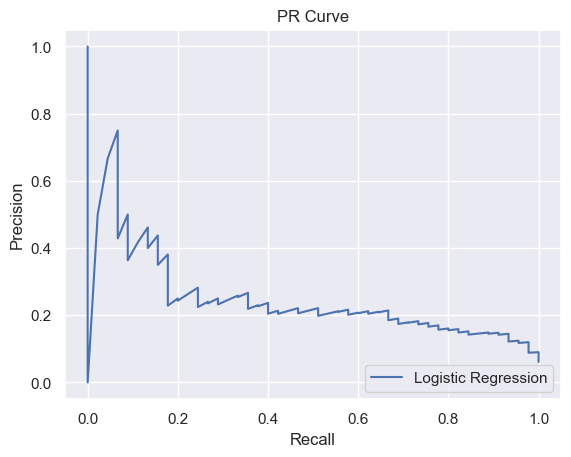

In [35]:
# PR Curve
lr_precision, lr_recall, _ = precision_recall_curve(Y_test, lr_probs)

# plot PR curve
plot_curve(y1=lr_precision,
           x1=lr_recall,
           y2=None,
           x2=None,
           y_label='Precision',
           x_label='Recall',
           y1_label='Logistic Regression',
           y2_label=None,
           title='PR Curve')



##(3) Support Vector Machine (SVM-C) :

Hyperparameter tuning using cross validation:




In [36]:
from sklearn.model_selection import RepeatedStratifiedKFold
from sklearn.model_selection import GridSearchCV
from sklearn.svm import SVC

# define model and parameters
model_svc = SVC()
kernel = ['poly', 'rbf']
C = [ 10, 1.0, 0.1, 0.01]
gamma = ['scale']

# define grid search
grid = dict(kernel=kernel,C=C,gamma=gamma)
cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=1)
grid_search = GridSearchCV(estimator=model_svc, param_grid=grid, n_jobs=-1, cv=cv, scoring='accuracy',error_score=0)
result_svc = grid_search.fit(X_train, Y_train)

In [37]:
result_svc.best_params_ #the best hyperparameters after tuning

{'C': 1.0, 'gamma': 'scale', 'kernel': 'rbf'}

In [38]:
# Fit this best model to training data
classifier_svc = SVC(C=1.0, gamma='scale', kernel='rbf')
classifier_svc.fit(X_train, Y_train)

SVC()

In [39]:
# Evaluate on validation set 
Y_pred = classifier_svc.predict(X_val)

Model Performance:

              precision    recall  f1-score   support

           0       0.97      1.00      0.98       714
           1       0.00      0.00      0.00        23

    accuracy                           0.97       737
   macro avg       0.48      0.50      0.49       737
weighted avg       0.94      0.97      0.95       737

Mean Square Error: 0.031207598371777476


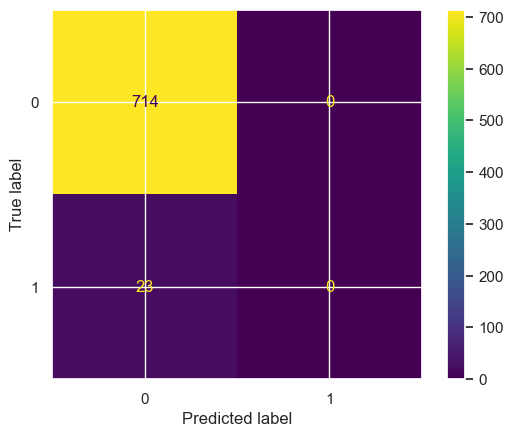

In [40]:
# Performance Statistics
print(classification_report(Y_val, Y_pred))
cm = confusion_matrix(Y_val, Y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm,display_labels=[0,1])
disp.plot();

from sklearn.metrics import mean_squared_error
print(f"Mean Square Error: {mean_squared_error(Y_val,Y_pred)}")

From the above we get the accuracy of SVM to be 96%, with 707/737 samples being correctly classified and 30/737 being wrongly classified as 0 label instead of their true label 1. 

##(4) K-nearest neighbours (KNN):

Hyperparameter tuning using cross validation:

In [41]:
from sklearn.neighbors import KNeighborsClassifier

model_knn = KNeighborsClassifier()
n_neighbors = range(1, 21, 2)
weights = ['uniform', 'distance']
metric = ['euclidean', 'manhattan', 'minkowski']

# define grid search
grid = dict(n_neighbors=n_neighbors,weights=weights,metric=metric)
cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=1)
grid_search = GridSearchCV(estimator=model_knn, param_grid=grid, n_jobs=-1, cv=cv, scoring='accuracy',error_score=0)
result_knn = grid_search.fit(X_train, Y_train)

In [42]:
result_knn.best_params_ #the best hyperparameters after tuning

{'metric': 'euclidean', 'n_neighbors': 11, 'weights': 'uniform'}

In [43]:
classifier_knn=KNeighborsClassifier(metric='euclidean',n_neighbors=13,weights='uniform')
classifier_knn.fit(X_train, Y_train)

KNeighborsClassifier(metric='euclidean', n_neighbors=13)

In [44]:
# Evaluate on validation set 
Y_pred_knn = classifier_knn.predict(X_val)

Model performance:

              precision    recall  f1-score   support

           0       0.97      1.00      0.98       714
           1       0.00      0.00      0.00        23

    accuracy                           0.97       737
   macro avg       0.48      0.50      0.49       737
weighted avg       0.94      0.97      0.95       737



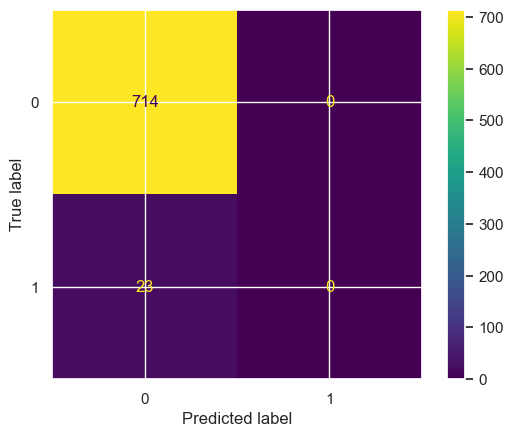

In [45]:
# Performance Statistics
print(classification_report(Y_val, Y_pred_knn))
cm = confusion_matrix(Y_val, Y_pred_knn)
disp = ConfusionMatrixDisplay(confusion_matrix=cm,display_labels=[0,1])
disp.plot();

From the above we get the accuracy of KNN to be 96%, with 707/737 samples being correctly classified and 30/737 being wrongly classified as 0 label instead of their true label 1. 

From the above four classification models, we observe that the accuracy of decision tree, svm and knn is more than that of logistic regression. This can be attributed to the factor of hyperparameter tuning that was done for all except logistic regression, and how different problems respond differently to various models. Thus, we have shown how cross validation on a validation set using either RandomSearchCV or GridSearchCV can help us optimize the parameters for the machine learning model. Also, that according to the problem and data at hand, an appropriate model should be built.

##How would the performance change if we carry out Dimension Reduction using PCA?

In [46]:
#Preparing the data for training the model
X_pca= df.drop(['stroke'], axis=1)
Y_pca= df['stroke']
print(len(X)) #number of samples

4909


In [47]:
from sklearn.decomposition import PCA
pca = PCA(n_components=2)
principalComponents = pca.fit_transform(X_pca)
principalDf = pd.DataFrame(data = principalComponents
             , columns = ['principal component 1', 'principal component 2'])

In [48]:
display(principalDf) #new X with two principal components along which the data will be projected

,principal component 1,principal component 2
0,0.863087,-0.377520
1,0.426606,-0.532852
2,-2.767062,0.118018
3,0.783195,-0.690932
4,0.500908,-0.833296
...,...,...
4904,1.238875,-1.352349
4905,0.759638,-0.813396
4906,0.990761,-0.332903
4907,-2.696664,0.745376


In [49]:
#defining a function for splitting the data
def split(X, Y, test_ratio = 0.4):
  # returns a numpy array after the split
  n = len(X)
  train_ratio = 1-test_ratio
  train_size = int(train_ratio*n)
  X_train = X[:train_size].to_numpy()
  Y_train = Y[:train_size].to_numpy()

  X_test = X[train_size:].to_numpy()
  Y_test = Y[train_size:].to_numpy() 

  return X_train, X_test, Y_train, Y_test

In [50]:
X_train_pca, X_test_pca, Y_train_pca, Y_test_pca = split(X_pca,Y_pca,0.4) #splitting our datasets according to the ratio given of 60:40

print(X_train_pca.shape)
print(X_test_pca.shape)
print(Y_train_pca.shape)
print(Y_test_pca.shape)

(2945, 21)
(1964, 21)
(2945,)
(1964,)


In [51]:
from sklearn.svm import SVC
classifier_svc_pca = SVC()
classifier_svc_pca.fit(X_train_pca, Y_train_pca)

# Evaluate on test set 
Y_pred_pca = classifier_svc_pca.predict(X_test_pca)

              precision    recall  f1-score   support

           0       0.96      1.00      0.98      1886
           1       0.00      0.00      0.00        78

    accuracy                           0.96      1964
   macro avg       0.48      0.50      0.49      1964
weighted avg       0.92      0.96      0.94      1964

Mean Square Error for Test Set: 0.03971486761710794


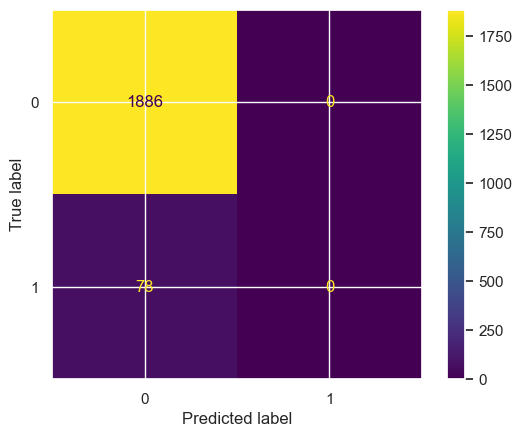

In [52]:
# Performance Statistics
from sklearn.metrics import classification_report, confusion_matrix, ConfusionMatrixDisplay
print(classification_report(Y_test_pca, Y_pred_pca))
cm = confusion_matrix(Y_test_pca, Y_pred_pca)
disp = ConfusionMatrixDisplay(confusion_matrix=cm,display_labels=[0,1])
disp.plot();

from sklearn.metrics import mean_squared_error
print(f"Mean Square Error for Test Set: {mean_squared_error(Y_test_pca,Y_pred_pca)}")

Therefore, by reducing the dimension of features from 21 columns to 3 principal components, and using svm classifier, we observe that the accuracy has reduced, since the mean square error is more for svc with pca. This means that pca is not a necessary tool to be applied if the features are not high in number and are manageable without it.

Visualizing the data after projecting the dimension to 2 components:

In [53]:
finalDf = pd.concat([principalDf, df[['stroke']]], axis = 1)

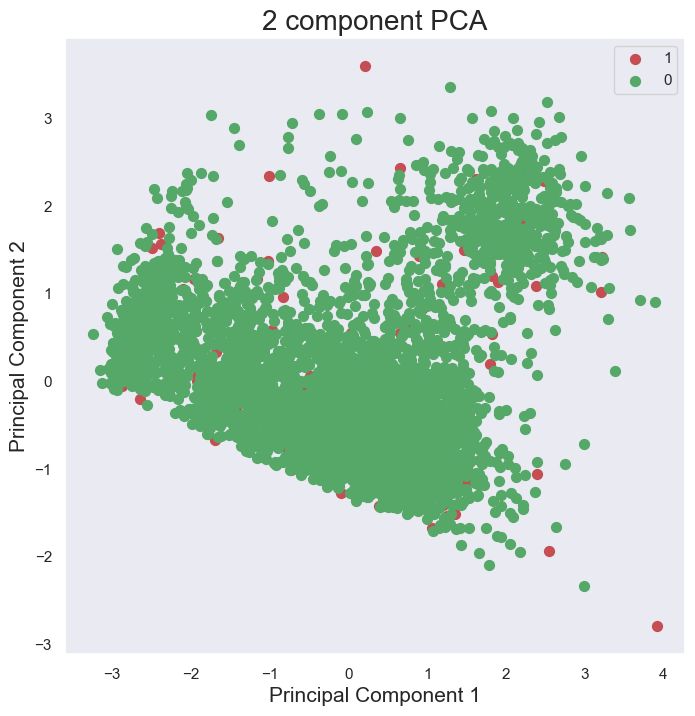

In [54]:
fig = plt.figure(figsize = (8,8))
ax = fig.add_subplot(1,1,1) 
ax.set_xlabel('Principal Component 1', fontsize = 15)
ax.set_ylabel('Principal Component 2', fontsize = 15)
ax.set_title('2 component PCA', fontsize = 20)
targets = [1,0]
colors = ['r', 'g']
for target, color in zip(targets,colors):
    indicesToKeep = finalDf['stroke'] == target
    ax.scatter(finalDf.loc[indicesToKeep, 'principal component 1']
               , finalDf.loc[indicesToKeep, 'principal component 2']
               , c = color
               , s = 50)
ax.legend(targets)
ax.grid()

No distinct cluster/pattern is found while visualizing the dimension reduced scatter plot of the data recorded for heart strokes, which may be due to the low number of data records given in the set for patients who have experienced a stroke (stroke=1).